# MNIST KNN

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("dataset/MNIST/train.csv")
df_test = pd.read_csv("dataset/MNIST/test.csv")

In [3]:
# training image data
X = np.array(df_train)[:, 1:]

# image label
Y = np.array(df_train)[:, 0]

In [4]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

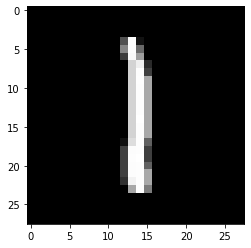

In [5]:
plt.imshow(X[1000].reshape((28,28)), cmap="gray");

In [6]:
Y.shape

(42000,)

In [7]:
df_train.shape

(42000, 785)

In [8]:
df_test.shape

(28000, 784)

In [9]:
test = np.array(df_test)

In [10]:
# distance function to calculate the distance between two points in euclidean space having n dimensions(784 in this case)
def distance(p1, p2):
    return np.sum((p2 - p1)**2)**.5


In [11]:
# knn function to find the k nearest points to the input point
# first we will calc distance from input to each training data point then sort(obv in increasing order) them and take 
# first k and make predictions based upon them

def knn(X , Y, test , k = 500):
    # it will have the distance( from the input point ) and label of each point as tuple ie : (distance, label)
    d = []
    r = X.shape[0]
    for i in range(r):
        d.append((distance(test, X[i]), Y[i]))
        
    # l is the list of sorted distance label
    l = np.array(sorted(d))[:, 1]
    l = l[:k]
    u = np.unique(l, return_counts = True)
    
    # convert the unique labels with their frequency into key value pair
    freq_dict = dict()
    for i in range(len(u[0])):
        freq_dict[u[0][i]] = u[1][i]
    
    # get the key whose value is maxmimum in the dictionary
    pred = int(max(freq_dict, key = freq_dict.get))
    
    accuracy = int(freq_dict[pred])
    
    percentage_accuracy = int((accuracy/k)*100)
    
    print("I can say with %d%% of accurancy that test input is %d" %(percentage_accuracy, pred))
    
    return freq_dict


    
    
    
    

In [12]:
knn(X, Y, test[1134])

I can say with 96% of accurancy that test input is 3


{3.0: 483, 5.0: 12, 8.0: 1, 9.0: 4}

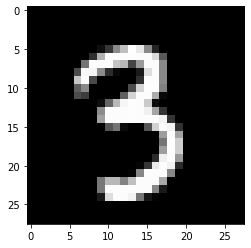

In [13]:
plt.imshow(test[1134].reshape(28, 28), cmap = "gray");

In [22]:
import matplotlib.image as img 
import cv2

In [23]:
# reading the following images and storing them into a list
img_name = ["zero", "one", "two", "three", "four", "five", "six", "seven", "eight"]
abs_path = "dataset/MNIST/"
grid = []
for each in img_name:
    grid.append(img.imread(abs_path + each + ".jpg"))

In [24]:
# convert the rgb into gray code resulting 3D matrix into 2D
for i in range(len(grid)):
    grid[i] = cv2.cvtColor(grid[i], cv2.COLOR_RGB2GRAY)

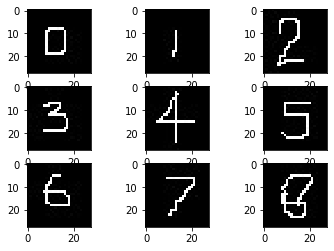

In [27]:
# just for the sake of visualization, showing these images into a grid
f, axarr = plt.subplots(3,3) # figsize(x, y) for size of each
n = 0;
for i in range(3):
        for j in range(3):
            axarr[i, j].imshow(grid[n], cmap = "gray")
            n = n + 1

In [33]:
# convert each 28x28 image matrix into an array

for i in range(len(grid)):
    grid[i] = grid[i].flatten()


In [35]:
grid[6].shape

(784,)

In [38]:
knn(X, Y, grid[1])

I can say with 96% of accurancy that test input is 1


{1.0: 483, 2.0: 2, 3.0: 2, 4.0: 1, 5.0: 5, 6.0: 3, 7.0: 2, 9.0: 2}